<a href="https://colab.research.google.com/github/JelanAngeloBLoy-a/CPE-031-Visualization-and-Data-Analysis/blob/main/Hands_on_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CPE 031 Loy-a/SampleData.csv')
df


,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,1/6/21,East,Jones,Pencil,95,1.99,189.05
1,1/23/21,Central,Kivell,Binder,50,19.99,999.50
2,2/9/21,Central,Jardine,Pencil,36,4.99,179.64
3,2/26/21,Central,Gill,Pen,27,19.99,539.73
4,3/15/21,West,Sorvino,Pencil,56,2.99,167.44
5,4/1/21,East,Jones,Binder,60,4.99,299.40
6,4/18/21,Central,Andrews,Pencil,75,1.99,149.25
7,5/5/21,Central,Jardine,Pencil,90,4.99,449.10
8,5/22/21,West,Thompson,Pencil,32,1.99,63.68
9,6/8/21,East,Jones,Binder,60,8.99,539.40


In [5]:

df['OrderDate'] = pd.to_datetime(df['OrderDate'])


mask = df.duplicated(subset=['Region', 'OrderDate'], keep=False)


duplicate_sales = df[mask]


duplicate_sales = duplicate_sales.sort_values(by=['Region', 'OrderDate', 'Rep'])

print(duplicate_sales)


    OrderDate   Region     Rep     Item  Units  Unit Cost       Total
14 2021-09-01  Central   Smith     Desk      2     125.00     250.00 
15 2021-09-01  Central   Smith     Desk      2     125.00     250.00 
33 2022-07-21  Central  Morgan  Pen Set     55      12.49     686.95 
34 2022-07-21  Central  Morgan  Pen Set     55      12.49     686.95 
35 2022-07-21  Central  Morgan  Pen Set     55      12.49     686.95 
21 2021-12-29     East  Parent  Pen Set     74      15.99   1,183.26 
22 2021-12-29     East  Parent  Pen Set     74      15.99   1,183.26 


/tmp/ipython-input-2087570824.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])


In [6]:
df[df['OrderDate'].isin(['Central','East'])]

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total


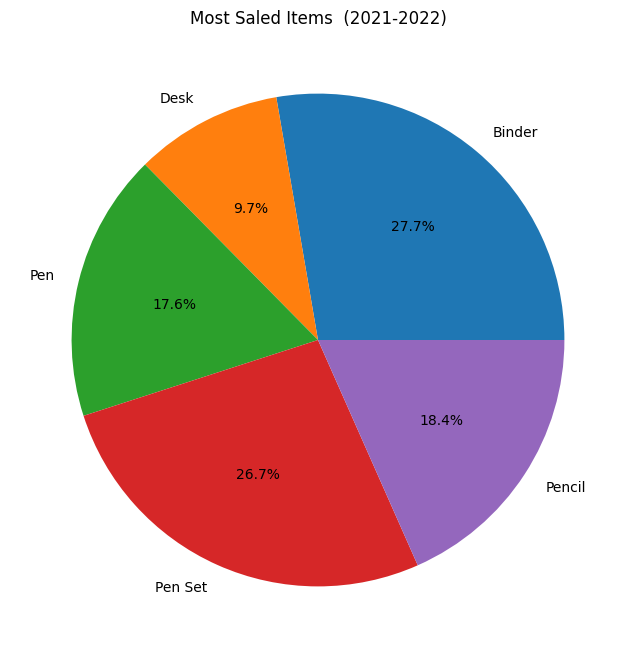

In [7]:
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
total=df.groupby('Item')['Total'].sum()

# Create a pie chart
total.plot.pie(figsize=(8, 8), autopct='%1.1f%%')

# Add title
plt.title('Most Saled Items  (2021-2022)')

# Remove y-axis label
plt.ylabel('')

# Show chart
plt.show()

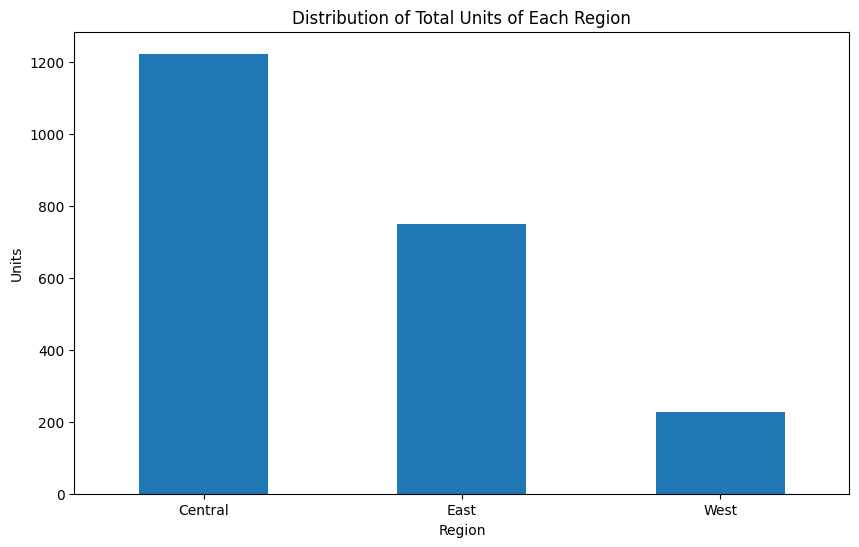

In [8]:
total=df.groupby('Region')['Units'].sum()

plt.figure(figsize=(10,6))

total.plot(kind= 'bar')
plt.xticks(rotation=0)
plt.title('Distribution of Total Units of Each Region')
plt.xlabel('Region')
plt.ylabel('Units')
plt.show()

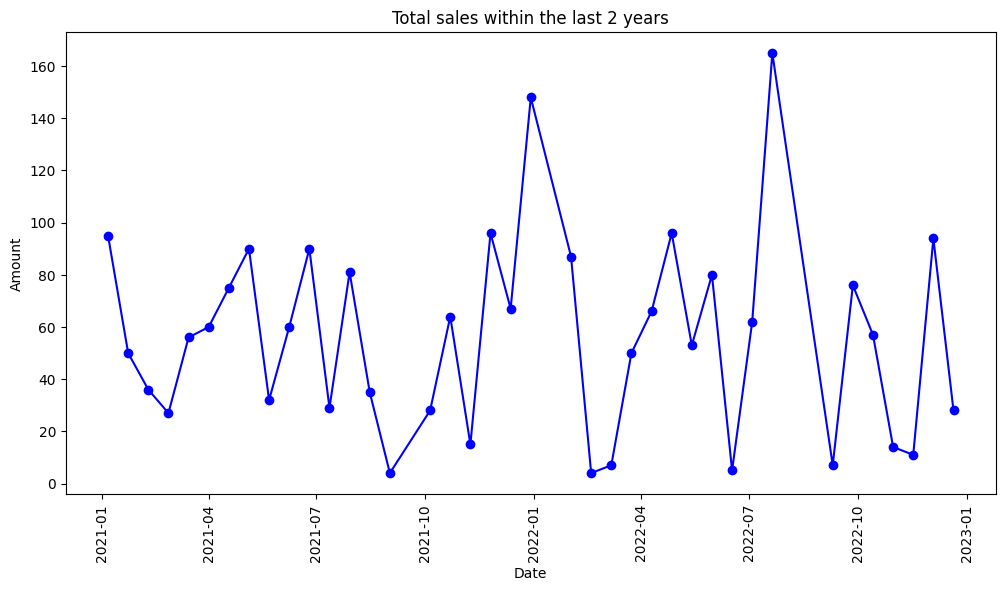

In [10]:
total=df.groupby('OrderDate')['Units'].sum()


# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(total.index, total.values, marker='o', linestyle='-', color='blue')

# Add labels and title
plt.title('Total sales within the last 2 years')
plt.xlabel('Date')
plt.ylabel('Amount')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show chart
plt.show()